# Assignment : 1 :--> Linear and Logistic Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [21]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Advertising.csv') 
new_df = df[['TV','Sales']]
X = np.array(new_df[['TV']]) 
y = np.array(new_df[['Sales']]) 
print(X.shape) 
print(y.shape)
df.sample(5)


In [4]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Advertising.csv') 
new_df = df[['TV','Sales']]
X = np.array(new_df[['TV']]) 
y = np.array(new_df[['Sales']]) 
print(X.shape) 
print(y.shape)
df.sample(5)


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
363,38,20,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 620 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2011 Maybach Landaulet,Maybach,2011 Maybach Landaulet,2011,620,738
2376,158,16,217,Rear-wheel drive,GMC 6.0L 8 Cylinder 352 hp 382 ft-lbs,True,6,6 Speed Automatic,10,Gasoline,16,Automatic transmission,2011 GMC Yukon XL 3/4 Ton SLT,GMC,2011 GMC Yukon XL,2011,352,382
83,66,230,69,All-wheel drive,Volvo 3.2L 6 Cylinder 235 hp 236 ft-lbs,True,6,6 Speed Automatic,16,Gasoline,22,Automatic transmission,2010 Volvo XC70 3.2,Volvo,2010 Volvo XC70,2010,235,236
3066,127,22,181,Rear-wheel drive,GMC 2.9L 4 Cylinder 185 hp 190 ft-lbs,True,5,5 Speed Manual,18,Gasoline,25,Manual transmission,2010 GMC Canyon SLE 2WD,GMC,2010 GMC Canyon,2010,185,190
525,96,228,125,Rear-wheel drive,Chevrolet 3.6L 6 Cylinder 323 hp 278 ft-lbs,True,6,6 Speed Manual,17,Gasoline,28,Manual transmission,2012 Chevrolet Camaro Coupe 1LT,Chevrolet,2012 Chevrolet Camaro Coupe,2012,323,278


In [6]:
print(df.shape)
print(df['Identification.Make'].value_counts())

(5076, 18)
Chevrolet             626
Ford                  603
GMC                   368
Toyota                325
Nissan                294
Dodge                 260
Honda                 200
Cadillac              200
Hyundai               188
Mazda                 168
Kia                   135
BMW                   133
Volkswagen            129
Jeep                  119
Subaru                105
Volvo                 103
Audi                   87
Infiniti               85
Buick                  71
Mercedes               64
MINI                   62
Saab                   59
BMW Motorrad           58
Lexus                  52
Suzuki                 51
Porsche                51
Mitsubishi             51
Grand Cherokee         48
Jaguar                 44
Lincoln                43
Aston Martin           43
Land Rover             35
Acura                  33
Chrysler               30
Mercury                28
Scion                  26
Bentley                18
Maybach                13
M

In [8]:
new_df=df[df['Identification.Make']=='Volkswagen']
print(new_df.shape)
print(new_df.isnull().sum())
new_df=new_df.dropna()
new_df.shape
new_df.isnull().sum()
new_df.sample(2)

(129, 18)
Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
1008,148,75,16,Front-wheel drive,Volkswagen 2.0L 4 Cylinder 200 hp 207 ft-lbs T...,True,6,6 Speed Automatic,18,Gasoline,24,Automatic transmission,2010 Volkswagen Tiguan S AT,Volkswagen,2010 Volkswagen Tiguan,2010,200,207
4616,223,204,244,Front-wheel drive,Volkswagen 2.0L 4 Cylinder 140 hp 236 ft-lbs T...,True,6,6 Speed Manual,30,Diesel fuel,42,Manual transmission,2012 Volkswagen Jetta SportWagen TDI,Volkswagen,2012 Volkswagen Jetta SportWagen,2012,140,236


# LAB ASSIGNMENTS

# SET - A  : 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [28]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Advertising.csv') 
df.sample(5)

,ID,TV,Radio,Newspaper,Sales
57,58,136.2,19.2,16.6,13.2
199,200,232.1,8.6,8.7,13.4
144,145,96.2,14.8,38.9,11.4
110,111,225.8,8.2,56.5,13.4
103,104,187.9,17.2,17.9,14.7


In [29]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Advertising.csv') 
new_df = df[['TV','Sales']]
X = np.array(new_df[['TV']]) 
y = np.array(new_df[['Sales']]) 
print(X.shape) 
print(y.shape)
df.sample(5)

(200, 1)
(200, 1)


,ID,TV,Radio,Newspaper,Sales
64,65,131.1,42.8,28.9,18.0
140,141,73.4,17.0,12.9,10.9
178,179,276.7,2.3,23.7,11.8
134,135,36.9,38.6,65.6,10.8
99,100,135.2,41.7,45.9,17.2


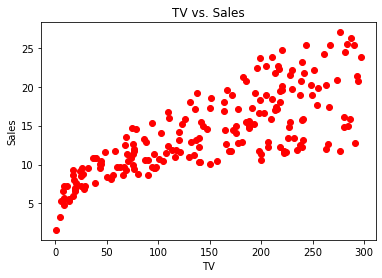

In [13]:
plt.scatter(X,y,color="red") 
plt.title('TV vs. Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.333,random_state=15)
regressor = LinearRegression() 
print("Training Set :")
print(X_train)
print("Test Set :")
print(X_test)

Training Set :
[[287.6]
 [151.5]
 [210.7]
 [  8.7]
 [ 97.5]
 [237.4]
 [230.1]
 [171.3]
 [ 13.1]
 [240.1]
 [109.8]
 [165.6]
 [222.4]
 [102.7]
 [193.7]
 [289.7]
 [261.3]
 [120.5]
 [206.9]
 [ 17.9]
 [205. ]
 [  8.6]
 [ 53.5]
 [ 36.9]
 [ 18.8]
 [107.4]
 [ 95.7]
 [232.1]
 [ 94.2]
 [ 97.2]
 [ 76.4]
 [170.2]
 [156.6]
 [139.3]
 [241.7]
 [276.7]
 [163.5]
 [255.4]
 [216.4]
 [ 59.6]
 [217.7]
 [224. ]
 [ 75.3]
 [204.1]
 [123.1]
 [ 43.1]
 [ 89.7]
 [164.5]
 [229.5]
 [175.7]
 [129.4]
 [131.1]
 [262.7]
 [216.8]
 [ 87.2]
 [187.9]
 [290.7]
 [213.5]
 [248.8]
 [ 11.7]
 [199.1]
 [ 38. ]
 [265.2]
 [ 67.8]
 [  8.4]
 [134.3]
 [ 69.2]
 [110.7]
 [139.5]
 [100.4]
 [239.8]
 [293.6]
 [  0.7]
 [265.6]
 [140.3]
 [  7.8]
 [225.8]
 [ 88.3]
 [ 27.5]
 [ 70.6]
 [117.2]
 [177. ]
 [191.1]
 [ 68.4]
 [175.1]
 [ 62.3]
 [ 48.3]
 [ 31.5]
 [120.2]
 [180.8]
 [135.2]
 [ 38.2]
 [222.4]
 [238.2]
 [ 13.2]
 [206.8]
 [177. ]
 [182.6]
 [199.8]
 [ 16.9]
 [188.4]
 [187.8]
 [166.8]
 [197.6]
 [ 18.7]
 [ 44.5]
 [ 78.2]
 [  7.3]
 [195.4]
 [28

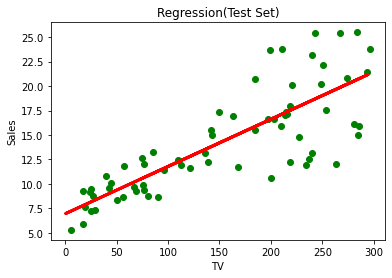

,ID,TV,Radio,Newspaper,Sales
56,57,7.3,28.1,41.4,5.5
13,14,97.5,7.6,7.2,9.7
109,110,255.4,26.9,5.5,19.8
111,112,241.7,38.0,23.2,21.8
175,176,276.9,48.9,41.8,27.0
147,148,243.2,49.0,44.3,25.4
29,30,70.6,16.0,40.8,10.5
97,98,184.9,21.0,22.0,15.5


In [32]:
regressor.fit(X_train,y_train)
plt.scatter(X_test,y_test,color="green") 
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) 
plt.title('Regression(Test Set)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()
df.sample(8)

In [16]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean Error :',mean_squared_error(y_test,y_pred)) 

R2 score: 0.64
Mean Error : 9.9378566174647


# SET - A :  2

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Real estate.csv')
df.sample(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
221,222,2013.333,9.0,1402.0160,0,24.98569,121.52760,38.5
31,32,2012.750,29.6,769.4034,7,24.98281,121.53408,25.0
187,188,2013.000,8.9,3078.1760,0,24.95464,121.56627,22.0
267,268,2012.833,34.7,482.7581,5,24.97433,121.53863,41.1
335,336,2013.583,27.3,337.6016,6,24.96431,121.54063,36.5


(414, 1)
(414, 1)


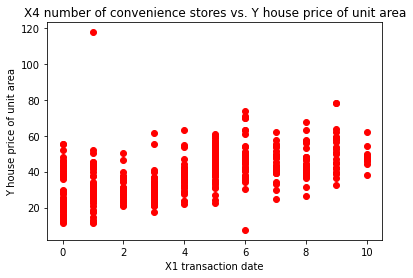

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
275,276,2012.667,1.5,23.38284,7,24.96772,121.54102,49.7
113,114,2013.333,14.8,393.26060,6,24.96172,121.53812,7.6
377,378,2013.333,3.9,49.66105,8,24.95836,121.53756,56.8
99,100,2013.417,6.4,90.45606,9,24.97433,121.54310,62.2
270,271,2013.333,10.8,252.58220,1,24.97460,121.53046,117.5
257,258,2013.250,17.3,444.13340,1,24.97501,121.52730,43.9


In [33]:
df = pd.read_csv('/home/mcs230/anaconda3/bin/Real estate.csv')
new_df = df[['X4 number of convenience stores','Y house price of unit area']]
X = np.array(new_df[['X4 number of convenience stores']]) 
y = np.array(new_df[['Y house price of unit area']]) 
print(X.shape) 
print(y.shape) 
plt.scatter(X,y,color="red")
plt.title('X4 number of convenience stores vs. Y house price of unit area')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()
df.sample(7)

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [41]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

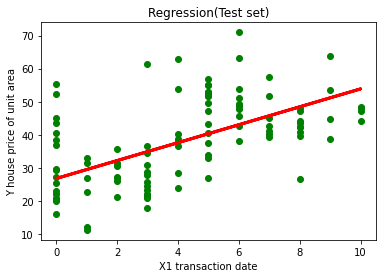

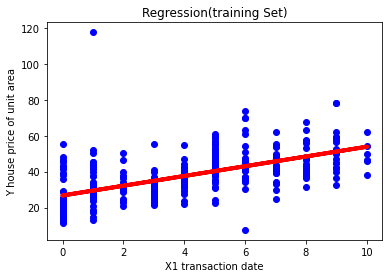

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(Test set)')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=4)
plt.title('Regression(training Set)')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()

In [44]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean Error :',mean_squared_error(y_test,y_pred)) 
df.sample(5)

R2 score: 0.29
Mean Error : 117.15803950272142


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
24,25,2013.000,39.6,480.6977,4,24.97353,121.53885,38.8
227,228,2012.917,32.4,265.0609,8,24.98059,121.53986,40.2
53,54,2013.083,13.3,492.2313,5,24.96515,121.53737,38.9
356,357,2012.833,10.3,211.4473,1,24.97417,121.52999,45.3
159,160,2012.667,15.5,815.9314,4,24.97886,121.53464,37.4


# SET - A : 3

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("/home/mcs230/anaconda3/bin/users.csv")
df.sample(7)

,username,firstname,lastname,password
7,msanders,Michael,Sanders,YellowTurtle
0,jsmith,John,Smith,p@ssw3rd
6,janedoe,Jane,Doe,GreenFr0g
11,jhalprin,Jim,Halprin,BlackTurkey
18,fransmith,Fran,Smith,YellowDuck
1,janesmith,Jane,Smith,s3cret
8,boballen,Bob,Allen,PurpleSnake


(20, 1)
(20, 1)


ValueError: could not convert string to float: "['John']"

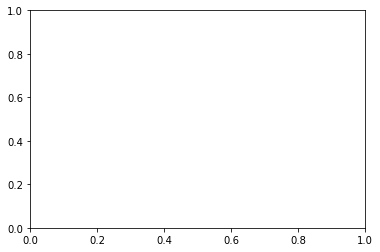

In [81]:
import numpy as np
import pandas as np
df = pd.read_csv('/home/mcs230/anaconda3/bin/users.csv')
new_df = df[['firstname','lastname']]
X = np.array(new_df[['firstname']]) 
y = np.array(new_df[['lastname']]) 
print(X.shape) 
print(y.shape) 
plt.scatter(X,y,color="red")
plt.title('firstname vs lastname')
plt.xlabel('firstname')
plt.ylabel('lastname')
plt.show()


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [65]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

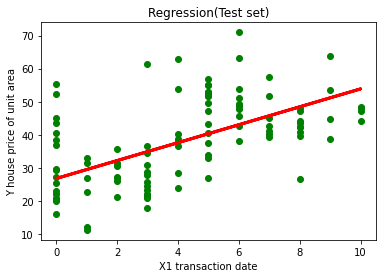

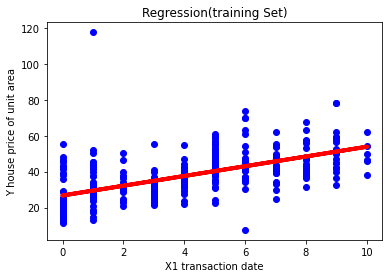

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color="green")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3)
plt.title('Regression(Test set)')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()
plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=4)
plt.title('Regression(training Set)')
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.show()

In [67]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) 
print('Mean Error :',mean_squared_error(y_test,y_pred)) 
df.sample(5)

R2 score: 0.29
Mean Error : 117.15803950272142


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
42,43,2013.417,36.1,519.46170,5,24.96305,121.53758,34.7
104,105,2012.667,32.7,392.44590,6,24.96398,121.54250,30.5
296,297,2012.750,12.5,1144.43600,4,24.99176,121.53456,34.1
17,18,2012.750,17.7,350.85150,1,24.97544,121.53119,37.4
172,173,2013.583,6.6,90.45606,9,24.97433,121.54310,58.1


In [46]:
data = pd.read_csv("/home/mcs230/anaconda3/bin/suv_data.csv")
x = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values
print("x")
print(x)
print("y")
print(y)

x
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  18

Accuracy:  0.615


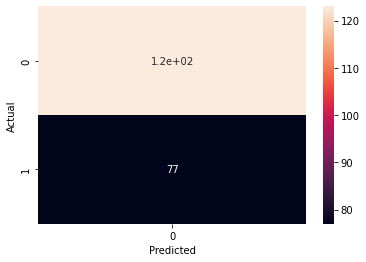

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


In [50]:
print (x_test)
print (y_pred)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [48]:
df.sample(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
147,148,2012.750,3.2,489.8821,8,24.97017,121.54494,43.2
55,56,2012.833,31.7,1160.6320,0,24.94968,121.53009,13.7
282,283,2012.917,2.0,1455.7980,1,24.95120,121.54900,25.6
135,136,2012.917,18.9,1009.2350,0,24.96357,121.54951,20.8
80,81,2013.500,11.8,533.4762,4,24.97445,121.54765,40.3
267,268,2012.833,34.7,482.7581,5,24.97433,121.53863,41.1
217,218,2012.917,28.0,372.6242,6,24.97838,121.54119,40.8
245,246,2013.417,7.5,639.6198,5,24.97258,121.54814,40.8
280,281,2013.250,2.3,184.3302,6,24.96581,121.54086,45.4
269,270,2013.000,17.6,837.7233,0,24.96334,121.54767,23.0


# SET - B : 1

In [59]:
from sklearn import metrics
import seaborn as sn


In [60]:
df = pd.read_csv("/home/mcs230/anaconda3/bin/fish.csv")
df.sample(8)

,Species,Weight,Length,Diagonal,Height,Width
45,Roach,160.0,22.5,25.3,7.0334,3.8203
136,Pike,540.0,43.0,45.8,7.7860,5.1296
94,Perch,150.0,23.0,24.5,5.2185,3.6260
51,Roach,180.0,25.2,27.9,7.0866,3.9060
124,Perch,1000.0,43.0,45.2,11.9328,7.2772
108,Perch,320.0,30.0,31.6,7.6156,4.7716
149,Smelt,9.8,11.2,12.4,2.0832,1.2772
77,Perch,100.0,18.0,19.2,5.2224,3.3216


In [82]:
data = pd.read_csv("/home/mcs230/anaconda3/bin/fish.csv")
x = data.iloc[:, [2,3]].values
y = data.iloc[:, 0].values
print("x")
print(x)
print("y")
print(y)

x
[[25.4 30. ]
 [26.3 31.2]
 [26.5 31.1]
 [29.  33.5]
 [29.  34. ]
 [29.7 34.7]
 [29.7 34.5]
 [30.  35. ]
 [30.  35.1]
 [30.7 36.2]
 [31.  36.2]
 [31.  36.2]
 [31.5 36.4]
 [32.  37.3]
 [32.  37.2]
 [32.  37.2]
 [33.  38.3]
 [33.  38.5]
 [33.5 38.6]
 [33.5 38.7]
 [34.  39.5]
 [34.  39.2]
 [34.5 39.7]
 [35.  40.6]
 [35.  40.5]
 [35.  40.9]
 [35.  40.6]
 [36.  41.5]
 [36.  41.6]
 [37.  42.6]
 [38.5 44.1]
 [38.5 44. ]
 [39.5 45.3]
 [41.  45.9]
 [41.  46.5]
 [14.1 16.2]
 [18.2 20.3]
 [18.8 21.2]
 [19.8 22.2]
 [20.  22.2]
 [20.5 22.8]
 [20.8 23.1]
 [21.  23.7]
 [22.  24.7]
 [22.  24.3]
 [22.5 25.3]
 [22.5 25. ]
 [22.5 25. ]
 [24.  27.2]
 [23.4 26.7]
 [23.5 26.8]
 [25.2 27.9]
 [26.  29.2]
 [27.  30.6]
 [31.7 35. ]
 [26.  28.7]
 [26.5 29.3]
 [28.  30.8]
 [31.  34. ]
 [36.4 39.6]
 [40.  43.5]
 [14.7 16.5]
 [15.5 17.4]
 [17.7 19.8]
 [19.  21.3]
 [20.  22.4]
 [20.7 23.2]
 [20.7 23.2]
 [21.5 24.1]
 [23.  25.8]
 [25.  28. ]
 [26.  29. ]
 [ 8.4  8.8]
 [13.7 14.7]
 [15.  16. ]
 [16.2 17.2]
 [17.4 18.

Accuracy:  0.7875


/home/mcs230/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


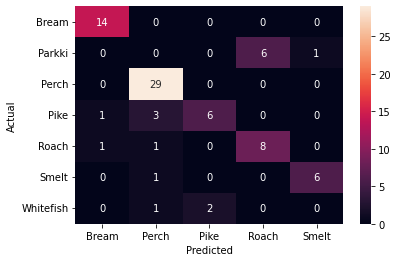

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


# ASSIGNMENT NO :- 2

# SET A :

In [ ]:
1): 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data= [['Bread','Milk'],
['Bread','Diaper','Beer','Eggs'],
['Milk','Diaper','Beer','Coke'],
['Bread','Milk','Diaper','Beer'],
['Bread','Milk','Diaper','Coke']
]
df = pd.DataFrame(data)
print(df)

       0       1       2     3
0  Bread    Milk    None  None
1  Bread  Diaper    Beer  Eggs
2   Milk  Diaper    Beer  Coke
3  Bread    Milk  Diaper  Beer
4  Bread    Milk  Diaper  Coke


In [4]:
te=TransactionEncoder()
te_array=te.fit(data).transform(data)
df=pd.DataFrame(te_array, columns=te.columns_)
print(df)


    Beer  Bread   Coke  Diaper   Eggs   Milk
0  False   True  False   False  False   True
1   True   True  False    True   True  False
2   True  False   True    True  False   True
3   True   True  False    True  False   True
4  False   True   True    True  False   True


In [5]:
freq_items = apriori(df, min_support = 0.5, use_colnames = True)
print(freq_items)

   support         itemsets
0      0.6           (Beer)
1      0.8          (Bread)
2      0.8         (Diaper)
3      0.8           (Milk)
4      0.6   (Beer, Diaper)
5      0.6  (Diaper, Bread)
6      0.6    (Milk, Bread)
7      0.6   (Diaper, Milk)


In [6]:
rules = association_rules(freq_items, metric ='support', min_threshold=0.05)
rules = rules.sort_values(['support', 'confidence'], ascending =[False,False])
print(rules)

  antecedents consequents  antecedent support  consequent support  support  \
0      (Beer)    (Diaper)                 0.6                 0.8      0.6   
1    (Diaper)      (Beer)                 0.8                 0.6      0.6   
2    (Diaper)     (Bread)                 0.8                 0.8      0.6   
3     (Bread)    (Diaper)                 0.8                 0.8      0.6   
4      (Milk)     (Bread)                 0.8                 0.8      0.6   
5     (Bread)      (Milk)                 0.8                 0.8      0.6   
6    (Diaper)      (Milk)                 0.8                 0.8      0.6   
7      (Milk)    (Diaper)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        1.00  1.2500      0.12         inf           0.50  
1        0.75  1.2500      0.12         1.6           1.00  
2        0.75  0.9375     -0.04         0.8          -0.25  
3        0.75  0.9375     -0.04         0.8          

In [ ]:
2):

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [14]:
data = [['Sheldon','Penny','Amy','Penny','Raj','Sheldon'],
['male','female','female','female','male','male']]
print(data)

[['Sheldon', 'Penny', 'Amy', 'Penny', 'Raj', 'Sheldon'], ['male', 'female', 'female', 'female', 'male', 'male']]


In [15]:
df = pd.DataFrame(data)
print(df)

         0       1       2       3     4        5
0  Sheldon   Penny     Amy   Penny   Raj  Sheldon
1     male  female  female  female  male     male


In [11]:
te=TransactionEncoder()
te_array=te.fit(data).transform(data)
df=pd.DataFrame(te_array, columns=te.columns_)
print(df)

     Amy  Penny    Raj  Sheldon  female   male
0   True   True   True     True   False  False
1  False  False  False    False    True   True


In [12]:
freq_items = apriori(df, min_support = 0.5, use_colnames = True)
print(freq_items)

    support                    itemsets
0       0.5                       (Amy)
1       0.5                     (Penny)
2       0.5                       (Raj)
3       0.5                   (Sheldon)
4       0.5                    (female)
5       0.5                      (male)
6       0.5                (Amy, Penny)
7       0.5                  (Raj, Amy)
8       0.5              (Sheldon, Amy)
9       0.5                (Raj, Penny)
10      0.5            (Sheldon, Penny)
11      0.5              (Sheldon, Raj)
12      0.5              (female, male)
13      0.5           (Raj, Amy, Penny)
14      0.5       (Sheldon, Amy, Penny)
15      0.5         (Sheldon, Raj, Amy)
16      0.5       (Sheldon, Raj, Penny)
17      0.5  (Sheldon, Raj, Amy, Penny)


In [13]:
rules = association_rules(freq_items, metric ='support', min_threshold=0.05)
rules = rules.sort_values(['support', 'confidence'], ascending =[False,False])
print(rules)

              antecedents            consequents  antecedent support  \
0                   (Amy)                (Penny)                 0.5   
1                 (Penny)                  (Amy)                 0.5   
2                   (Raj)                  (Amy)                 0.5   
3                   (Amy)                  (Raj)                 0.5   
4               (Sheldon)                  (Amy)                 0.5   
5                   (Amy)              (Sheldon)                 0.5   
6                   (Raj)                (Penny)                 0.5   
7                 (Penny)                  (Raj)                 0.5   
8               (Sheldon)                (Penny)                 0.5   
9                 (Penny)              (Sheldon)                 0.5   
10              (Sheldon)                  (Raj)                 0.5   
11                  (Raj)              (Sheldon)                 0.5   
12               (female)                 (male)                

In [ ]:
3):

In [16]:
import pandas as pd
import io
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [17]:
d = pd.read_csv('/home/mcs230/anaconda3/bin/Market_Basket_analysis.csv')
print(d)

                                                rules   support  confidence  \
0              {} => {NIRVANA HOOKAH SINGLE         }  0.119874    0.119874   
1   {POUTINE WITH FRIES            } => {NIRVANA H...  0.006330    0.129760   
2   {QUA  MINERAL WATER(1000ML)    } => {NIRVANA H...  0.005473    0.115084   
3   {RED BULL ENERGY DRINK         } => {NIRVANA H...  0.004887    0.183871   
4   {B.M.T. PANINI                 } => {SAMBUCA  ...  0.004687    0.125912   
5   {B.M.T. PANINI                 } => {NIRVANA H...  0.004601    0.123608   
6   {CAFFE LATTE                   } => {CAPPUCCIN...  0.004244    0.141766   
7   {RED BULL 2+1                  } => {SAMBUCA  ...  0.004144    0.248500   
8   {RED BULL ENERGY DRINK         } => {SAMBUCA  ...  0.004044    0.152151   
9   {B.M.T. PANINI                 } => {GREAT LAK...  0.004044    0.108637   
10  {B.M.T. PANINI                 } => {POUTINE W...  0.003801    0.102111   
11  {MOROCCAN MINT TEA             } => {NIRVANA H..

In [18]:
d=d.fillna("Hi");
print(d)

                                                rules   support  confidence  \
0              {} => {NIRVANA HOOKAH SINGLE         }  0.119874    0.119874   
1   {POUTINE WITH FRIES            } => {NIRVANA H...  0.006330    0.129760   
2   {QUA  MINERAL WATER(1000ML)    } => {NIRVANA H...  0.005473    0.115084   
3   {RED BULL ENERGY DRINK         } => {NIRVANA H...  0.004887    0.183871   
4   {B.M.T. PANINI                 } => {SAMBUCA  ...  0.004687    0.125912   
5   {B.M.T. PANINI                 } => {NIRVANA H...  0.004601    0.123608   
6   {CAFFE LATTE                   } => {CAPPUCCIN...  0.004244    0.141766   
7   {RED BULL 2+1                  } => {SAMBUCA  ...  0.004144    0.248500   
8   {RED BULL ENERGY DRINK         } => {SAMBUCA  ...  0.004044    0.152151   
9   {B.M.T. PANINI                 } => {GREAT LAK...  0.004044    0.108637   
10  {B.M.T. PANINI                 } => {POUTINE W...  0.003801    0.102111   
11  {MOROCCAN MINT TEA             } => {NIRVANA H..

In [19]:
te=TransactionEncoder()
te_array=te.fit(d).transform(d)
df=pd.DataFrame(te_array, columns=te.columns_)
print(df)

               C      H      L      R      S      a      b      c      d  ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False   True   True  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False   True  False  ...   
5    True  False   True   True  False   True   True  False   True  False  ...   
6    True  False   True  False   True   True   True  False   True  False  ...   
7    True   True  False  False  False  False   True   True   True  False  ...   
8   False  False  False  False  False  False  False  False  False  False  ...   
9   False  False  False  False  False  False  False  False  False  False  ...   
10  False  False  False  False  False  False  False  False  False  False  ...   
11  False  False  False  Fal

In [20]:
freq_items = apriori(df, min_support = 0.00000001, use_colnames = True)
print(freq_items)

       support                              itemsets
0     0.055556                                   ( )
1     0.018519                                   (C)
2     0.037037                                   (H)
3     0.018519                                   (L)
4     0.018519                                   (R)
...        ...                                   ...
7130  0.018519     (y, r, H, c, o, a, e, t, L, S,  )
7131  0.018519     (y, r, R, H, c, o, a, e, t, S,  )
7132  0.018519     (y, r, c, o, a, m, e, t, b, g,  )
7133  0.018519     (y, r, c, o, a, C, m, e, t, b, g)
7134  0.018519  (y, r, c, o, a, C, m, e, t, b, g,  )

[7135 rows x 2 columns]


In [21]:
rules = association_rules(freq_items, metric ='support', min_threshold=0.05)
rules = rules.sort_values(['support', 'confidence'], ascending =[False,False])
print(rules)

     antecedents            consequents  antecedent support  \
29           (c)                    (o)            0.092593   
28           (o)                    (c)            0.111111   
46           (o)                    (t)            0.111111   
47           (t)                    (o)            0.111111   
273       (o, e)                    (c)            0.074074   
...          ...                    ...                 ...   
5668         (t)     (y, r, c, o, e,  )            0.111111   
5792         (o)     (y, r, c, a, e, t)            0.111111   
5795         (t)     (y, r, c, o, a, e)            0.111111   
6045         (o)  (y, r, c, a, e, t,  )            0.111111   
6048         (t)  (y, r, c, o, a, e,  )            0.111111   

      consequent support   support  confidence  lift  leverage  conviction  \
29              0.111111  0.092593    1.000000   9.0  0.082305         inf   
28              0.092593  0.092593    0.833333   9.0  0.082305    5.444444   
46       